In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

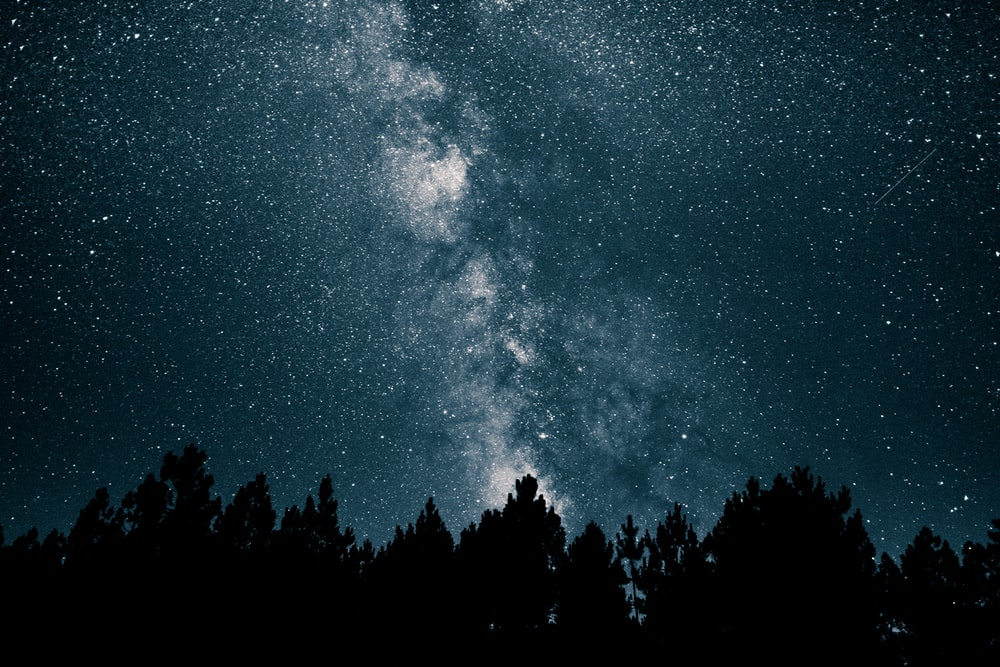

It is a dataset for classification of stars.


Temperature--Temperature(K)

L -- Relative Luminosity

R -- Relative Radius

A_M -- Absolute Magnitude

Color -- General Obs. Color

Spectral_Class -- SMASS Spec.

Type -- Type One-Hot from 0 - 5

**Installing LazyPredict**

In [ ]:
!pip install lazypredict

In [ ]:
!pip install pandas -U

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

**Importing Datset**

In [ ]:
df=pd.read_csv("/kaggle/input/star-type-classification/Stars.csv")
print(df.head())

In [ ]:
df.isnull().any()

In [ ]:
df.info()

In [ ]:
print(df.describe())

**Data Visualisation**

In [ ]:
corr=df.corr()

In [ ]:
sns.heatmap(corr,annot=True)

We can see the correlations by looking this correlation map. A_M variable highly negative correlated with Type so it is important for us.

In [ ]:
sns.pairplot(data=df,hue="Type")

In [ ]:
sns.barplot(x="Type",y="Temperature",data=df)

In [ ]:
sns.barplot(x="Type",y="L",data=df)

In [ ]:
sns.barplot(x="Type",y="R",data=df)

In [ ]:
sns.barplot(x="Type",y="A_M",data=df)

In [ ]:
sns.boxplot(df["Temperature"],data=df)

In [ ]:
sns.boxplot(df["L"],data=df)

In [ ]:
sns.boxplot(df["R"],data=df)

In [ ]:
sns.boxplot(df["A_M"],data=df)

There are too many outilers in R and L but remove them can lead to wrong model to us because variables already seperated in non-uniform way. Removing these outlierswill cause a lack of information so I don't touch them.

**Now we will take care of the categorical variables**

In [ ]:
cat_cols=["Color","Spectral_Class"]
for feature in cat_cols:
    print(feature,":",len(df[feature].unique()))

In [ ]:
df["Color"].value_counts()

Now as we can see that there are several similar types of colors. it needs some adjustments.

In [ ]:
x=["Blue-white","Blue White","yellow-white","Blue white","Yellowish White","Blue-White","White-Yellow","Whitish","white"]
for i in x:
    df.loc[df["Color"]==i,"Color"]= "White"

In [ ]:
for i in ["yellowish","Yellowish"]:
    df.loc[df["Color"]==i,"Color"]="Yellow"

In [ ]:
for i in ["Orange-Red","Pale yellow orange"]:
    df.loc[df["Color"]==i,"Color"]="Orange"

In [ ]:
df["Color"].value_counts()

Color column are adjusted

In [ ]:
df["Spectral_Class"].value_counts()

**One Hot Encoding**

In [ ]:
df=pd.get_dummies(data=df,columns=["Color","Spectral_Class"],drop_first=True)

In [ ]:
print(df.head())

**Splitting the dataset into dependent and independent variable**

In [ ]:
X=df.drop("Type",axis=1)
y=df["Type"]

**Splitting Dataset into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Applying lazypredict on the train test**

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

So we see that  XGBClassifier , RandomForestClassifier , Perceptron , ExtraTressClassifier , GaussianNB , LinearDiscriminantAnalysis are having an accuracy of 1.0 . This is because it is a small dataset with only 242 rows. As the data will increase there will be a change in the accuracy.

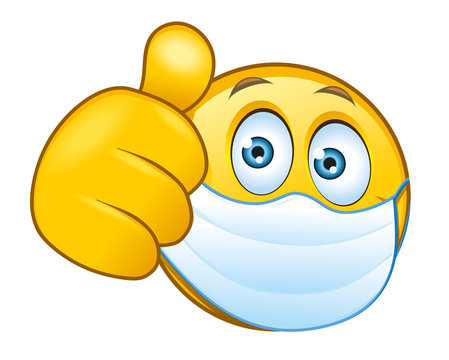